# Load all necessary libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import folium
import json
import seaborn as sbn
from urllib.request import urlopen
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Import data

In [52]:
fullData = pd.read_csv('valeursfoncieres-2021.txt', sep='|')

fullData2017 = pd.read_csv('valeursfoncieres-2017.txt', sep='|')
fullData2018 = pd.read_csv('valeursfoncieres-2018.txt', sep='|')
fullData2019 = pd.read_csv('valeursfoncieres-2019.txt', sep='|')
fullData2020 = pd.read_csv('valeursfoncieres-2020.txt', sep='|')
fullData2021 = pd.read_csv('valeursfoncieres-2021.txt', sep='|')

In [53]:
fullData

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
0                    NaN                 NaN             NaN             NaN   
1                    NaN                 NaN             NaN             NaN   
2                    NaN                 NaN             NaN             NaN   
3                    NaN                 NaN             NaN             NaN   
4                    NaN                 NaN             NaN             NaN   
...                  ...                 ...             ...             ...   
3379227              NaN                 NaN             NaN             NaN   
3379228              NaN                 NaN             NaN             NaN   
3379229              NaN                 NaN             NaN             NaN   
3379230              NaN                 NaN             NaN             NaN   
3379231              NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
0                   NaN             NaN             NaN               1   
1                   NaN             NaN             NaN               1   
2                   NaN             NaN             NaN               1   
3                   NaN             NaN             NaN               1   
4                   NaN             NaN             NaN               1   
...                 ...             ...             ...             ...   
3379227             NaN             NaN             NaN               1   
3379228             NaN             NaN             NaN               1   
3379229             NaN             NaN             NaN               1   
3379230             NaN             NaN             NaN               1   
3379231             NaN             NaN             NaN               1   

        Date mutation Nature mutation  ... Surface Carrez du 5eme lot  \
0          05/01/2021           Vente  ...                        NaN   
1          05/01/2021           Vente  ...                        NaN   
2          06/01/2021           Vente  ...                        NaN   
3          04/01/2021           Vente  ...                        NaN   
4          06/01/2021           Vente  ...                        NaN   
...               ...             ...  ...                        ...   
3379227    12/03/2021           Vente  ...                        NaN   
3379228    17/03/2021           Vente  ...                        NaN   
3379229    19/03/2021           Vente  ...                        NaN   
3379230    30/03/2021           Vente  ...                        NaN   
3379231    19/03/2021           Vente  ...                        NaN   

         Nombre de lots Code type local  \
0                     0             1.0   
1                     0             3.0   
2                     0             NaN   
3                     0             1.0   
4                     0             1.0   
...                 ...             ...   
3379227               2             2.0   
3379228               2             2.0   
3379229               1             3.0   
3379230               1             3.0   
3379231               2             4.0   

                                       Type local Identifiant local  \
0                                          Maison               NaN   
1                                      Dépendance               NaN   
2                                             NaN               NaN   
3                                          Maison               NaN   
4                                          Maison               NaN   
...                                           ...               ...   
3379227                               Appartement               NaN   
3379228                               Appartement               NaN   
3379229                                Dépendance               NaN   
3379230                                Dépe

# Clean data

In [54]:
columns_to_keep = ['Date mutation','Nature mutation','Valeur fonciere','Code postal','Commune','Code departement','Code commune','Nombre de lots','Code type local','Type local','Surface reelle bati','Nombre pieces principales','Surface terrain']
fullData['Date mutation'] = pd.to_datetime(fullData['Date mutation'])
fullData['Code departement'] = fullData['Code departement'].astype(str)
fullData = fullData[columns_to_keep]
fullData = fullData.dropna()
fullData['Valeur fonciere'] = pd.to_numeric(fullData['Valeur fonciere'].str.replace(',', '.'))
fullData


Date mutation Nature mutation  Valeur fonciere  Code postal  \
0          2021-05-01           Vente         185000.0       1370.0   
1          2021-05-01           Vente         185000.0       1370.0   
3          2021-04-01           Vente         204332.0       1310.0   
4          2021-06-01           Vente         320000.0       1250.0   
5          2021-06-01           Vente         320000.0       1250.0   
...               ...             ...              ...          ...   
3379201    2021-11-03           Vente        2000000.0      75002.0   
3379202    2021-11-03           Vente        2000000.0      75002.0   
3379203    2021-11-03           Vente        2000000.0      75002.0   
3379204    2021-11-03           Vente        2000000.0      75002.0   
3379205    2021-11-03           Vente        2000000.0      75002.0   

               Commune Code departement  Code commune  Nombre de lots  \
0        VAL-REVERMONT                1           426               0   
1        VAL-REVERMONT                1           426               0   
3              BUELLAS                1            65               0   
4            MONTAGNAT                1           254               0   
5            MONTAGNAT                1           254               0   
...                ...              ...           ...             ...   
3379201       PARIS 02               75           102               0   
3379202       PARIS 02               75           102               0   
3379203       PARIS 02               75           102               0   
3379204       PARIS 02               75           102               0   
3379205       PARIS 02               75           102               0   

         Code type local                                Type local  \
0                    1.0                                    Maison   
1                    3.0                                Dépendance   
3                    1.0                                    Maison   
4                    1.0                                    Maison   
5                    3.0                                Dépendance   
...                  ...                                       ...   
3379201              4.0  Local industriel. commercial ou assimilé   
3379202              2.0                               Appartement   
3379203              2.0                               Appartement   
3379204              2.0                               Appartement   
3379205              2.0                               Appartement   

         Surface reelle bati  Nombre pieces principales  Surface terrain  
0                       97.0                        5.0           2410.0  
1                        0.0                        0.0           2410.0  
3                       88.0                        4.0            866.0  
4                      168.0                        5.0           1426.0  
5                        0.0                        0.0           1426.0  
...                      ...                        ...              ...  
3379201                 41.0                        0.0             77.0  
3379202                 39.0                        2.0             77.0  
3379203                 39.0                        2.0             77.0  
3379204                 39.0                        2.0             77.0  
3379205                 12.0                        1.0             77.0  

[1112726 rows x 13 columns]

#### Argent total dépensé par mois selon les types de mutation pendant l'année 2017

In [55]:
MUTATIONS = fullData['Nature mutation'].unique()
def plotMutations(mut, data, ax):

    for m in MUTATIONS:
        temp = data[data['Nature mutation'] == m]
        result = temp.groupby(temp['Date mutation'].dt.to_period("M"))['Valeur fonciere'].sum()
        result.index = result.index.to_timestamp()
        x = result.index
        y = result.values
        
        if m == mut:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)  
            ax.autoscale()    
        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)
    
    ax.set_title(mut, fontfamily="Inconsolata", fontsize=14, fontweight=500)
    return ax

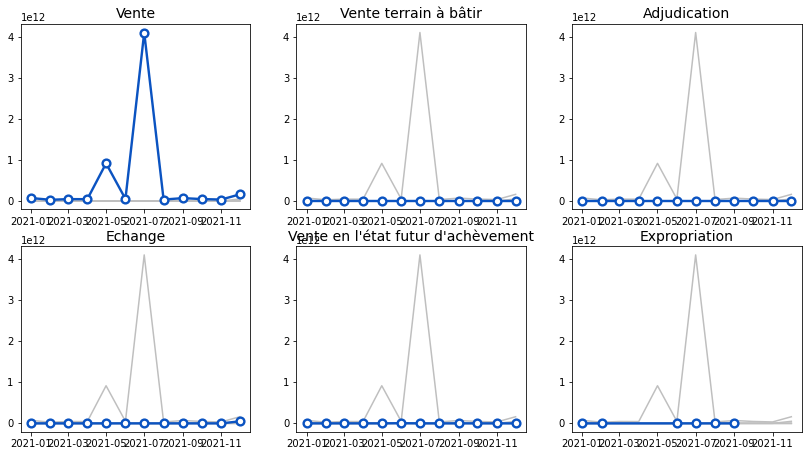

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7.5))
for idx, (ax, mut) in enumerate(zip(axes.ravel(), MUTATIONS)):
    # Only annotate the first panel
    annotate = idx == 0
    plotMutations(mut, fullData, ax)

#### Nombre de mutations par type au cours de l'année, en cumulé

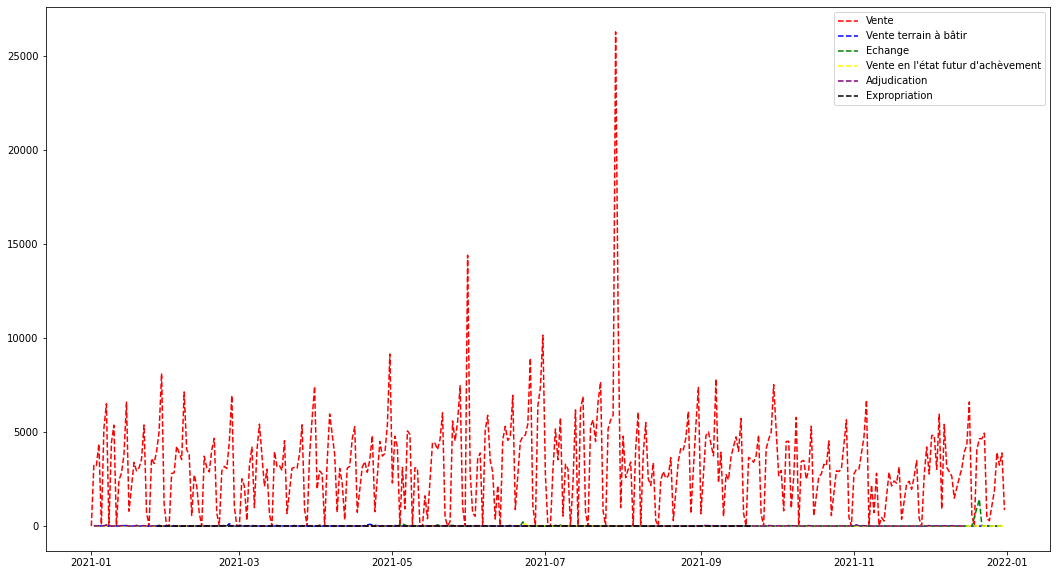

In [57]:
data1 = fullData[fullData['Nature mutation'] =='Vente'] 
data1 = data1.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()
#data1.index = data1.index.to_timestamp()

data2 = fullData[fullData['Nature mutation'] =='Vente terrain à bâtir'] 
data2 = data2.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()
#data2.index = data2.index.to_timestamp()

data3 = fullData[fullData['Nature mutation'] =='Echange'] 
data3 = data3.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()
#data3.index = data3.index.to_timestamp()

data4 = fullData[fullData['Nature mutation'] =="Vente en l'état futur d'achèvement"] 
data4 = data4.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()
#data4.index = data4.index.to_timestamp()

data5 = fullData[fullData['Nature mutation'] =='Adjudication'] 
data5 = data5.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()
#data5.index = data5.index.to_timestamp()

data6 = fullData[fullData['Nature mutation'] =='Expropriation'] 
data6 = data6.groupby(by='Date mutation',sort='Date mutation')['Valeur fonciere'].count()
#data6.index = data6.index.to_timestamp()

plt.figure(figsize=(18,10))
plt.plot(data1.index, data1.values, "r--", color="red")
plt.plot(data2.index, data2.values, "r--", color="blue")
plt.plot(data3.index, data3.values, "r--", color="green")
plt.plot(data4.index, data4.values, "r--", color="yellow")
plt.plot(data5.index, data5.values, "r--", color="purple")
plt.plot(data6.index, data6.values, "r--", color="black")
plt.legend(['Vente','Vente terrain à bâtir', 'Echange',"Vente en l'état futur d'achèvement",'Adjudication','Expropriation'])
plt.show()

# Nombre et répartitions des types de locaux

<BarContainer object of 4 artists>

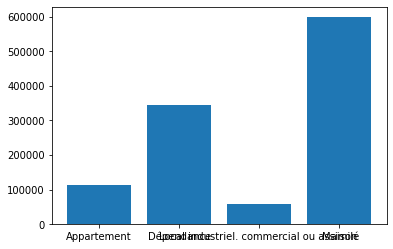

In [58]:
data = fullData.groupby(['Type local'])['Type local'].count()


plt.bar(data.index, data.values)


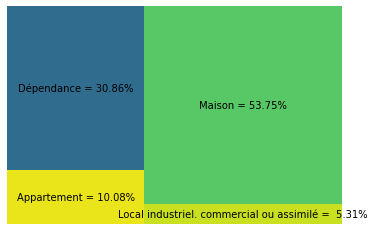

In [62]:
perc = [f'{i/data.values.sum()*100:5.2f}%' for i in data.values]
lbl = [f'{j[0]} = {j[1]}' for j in zip(data.index, perc)]

squarify.plot(sizes=data.values, label=lbl)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Type local', ylabel='Surface terrain'>

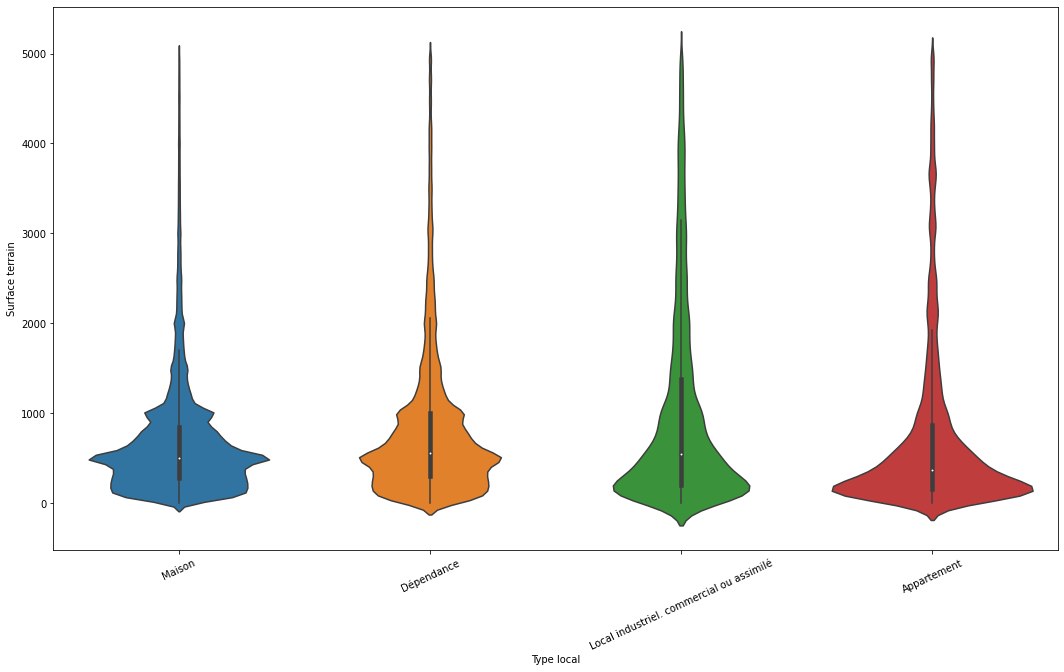

In [63]:
data=fullData[fullData["Surface terrain"]< 5000]
plt.figure(figsize=(18,10))
plt.xticks(rotation=25)
sbn.violinplot(x = "Type local",y="Surface terrain", data=data)

<AxesSubplot:xlabel='Type local', ylabel='Surface reelle bati'>

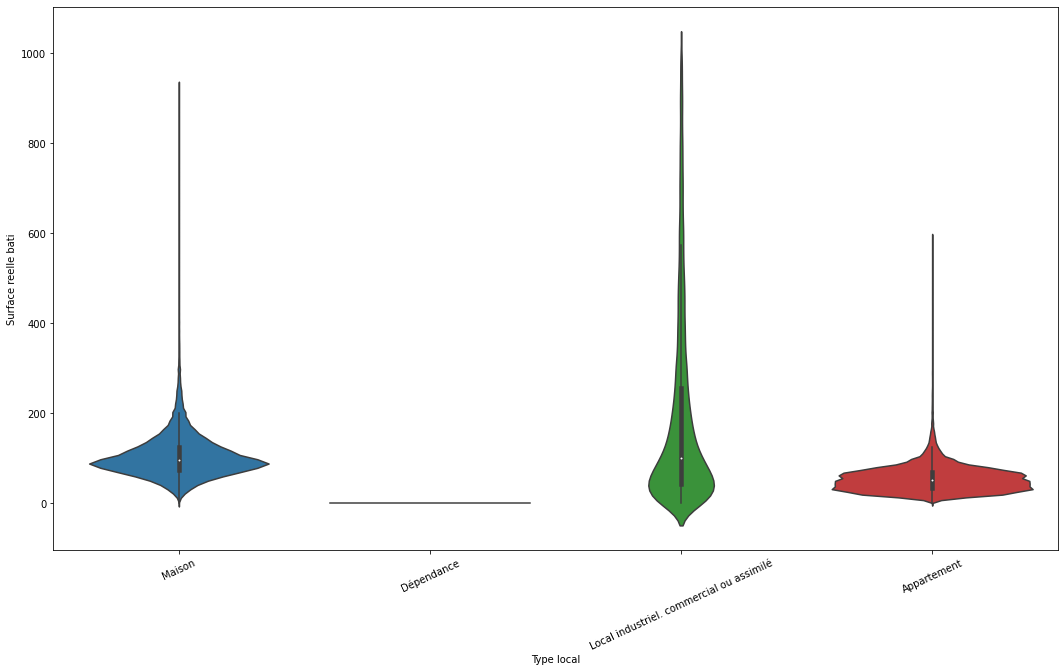

In [17]:
data=fullData[(fullData["Surface reelle bati"]< 1000) & (fullData["Surface reelle bati"].notna())]
plt.figure(figsize=(18,10))
plt.xticks(rotation=25)
sbn.violinplot(x = "Type local",y="Surface reelle bati", data=data)


# Analyse des données par département

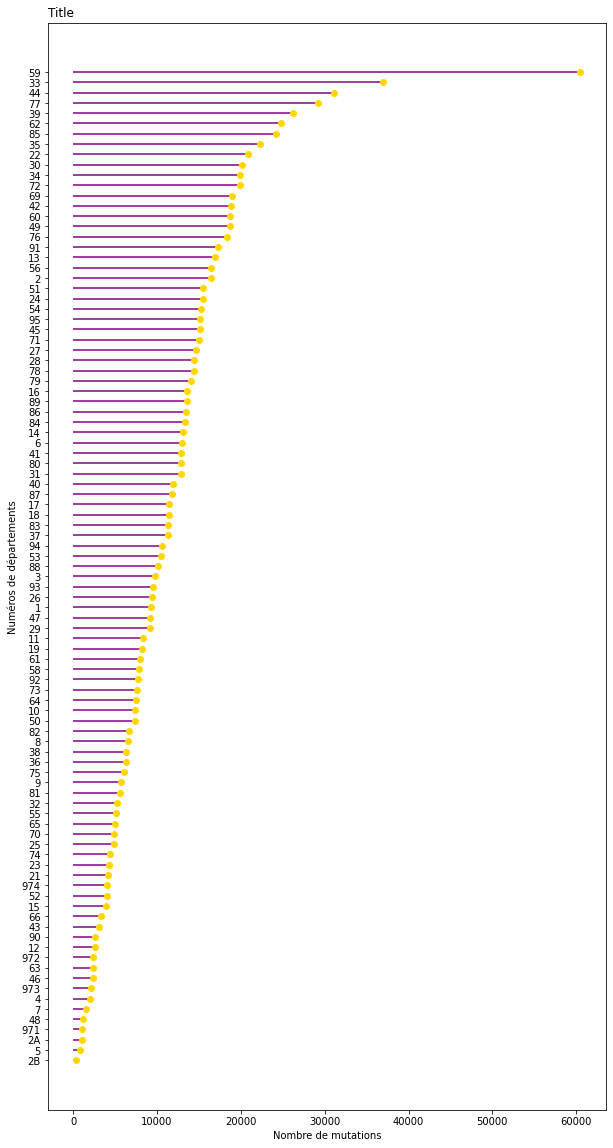

In [74]:
data = fullData.groupby(['Code departement'])['Nature mutation'].count().sort_values(ascending=True)
plt.figure(figsize=(10,20))

plt.hlines(y=data.index, xmin=0, xmax=data.values, color='purple')
plt.plot(data.values, data.index, "o", color="gold")
 
# Add titles and axis names
#plt.yticks(data.index, data.index)
plt.title("Title", loc='left')
plt.xlabel('Nombre de mutations')
plt.ylabel('Numéros de départements')
#data.plot.barh()
plt.show()

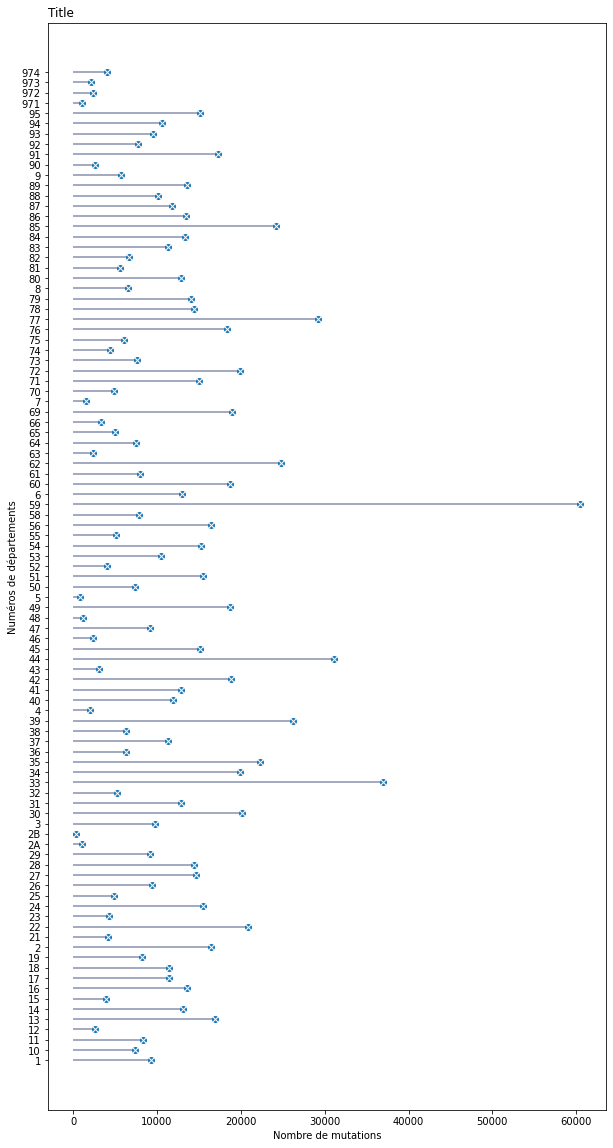

In [78]:
data1 = fullData.groupby(['Code departement'])['Nature mutation'].count()

data = fullData[((fullData['Nature mutation']=='Vente') & ((fullData['Type local'] == 'Maison') | (fullData['Type local'] == 'Appartement')))]
data = fullData.groupby(['Code departement'])['Nature mutation'].count()
plt.figure(figsize=(10,20))

plt.hlines(y=data1.index, xmin = 0, xmax = data1.values, color='red')
plt.hlines(y=data.index, xmin=0, xmax=data.values, color='skyblue')
plt.plot(data.values, data.index, "o")
plt.plot(data1.values, data1.index, "x", color="white")
 
# Add titles and axis names
#plt.yticks(data.index, data.index)
plt.title("Title", loc='left')
plt.xlabel('Nombre de mutations')
plt.ylabel('Numéros de départements')
#data.plot.barh()
plt.show()

In [261]:
myscale = None

def mapping_france_folium(data):
    map = folium.Map(location=[48.862, 2.346], zoom_start = 5)
    departments = f"https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
    d = {'Code': data.index, 'Valeur': np.log(data.values)}
    da = pd.DataFrame(d)
    

    folium.Choropleth(geo_data=departments, 
    data=da, 
    columns=['Code', 'Valeur'], 
    key_on='properties.code',
    #threshold_scale=myscale,
    fill_color= "PuRd",
    fill_opacity=1,
    line_opacity=.1).add_to(map)
    
    folium.LayerControl().add_to(map)
    return map


def mapping_france_plotly(data):
    with urlopen("https://france-geojson.gregoiredavid.fr/repo/departements.geojson") as dep:
        departments = json.load(dep)
    d = {'Code': data.index, 'Valeur': data.values}
    da = pd.DataFrame(d)
    
    fig = px.choropleth(da, 
        geojson=departments, 
        locations='Code', 
        color='Valeur',
        color_continuous_scale="Viridis",
        range_color=(0, 12),
        scope="europe"
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    # Improve the legend
    fig.update_layout(coloraxis_colorbar=dict(
        thicknessmode="pixels", thickness=10,
        lenmode="pixels", len=150,
        yanchor="top", y=0.8,
        ticks="outside", ticksuffix=" %",
        dtick=5
    ))    
    
    return fig

def mapping_Paris_circle(data, bigNumbers = False):
    map = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
    arr = json.load(open("arrondissements.geojson"))
    d = {'Code': data.index, 'Valeur': data.values}
    da = pd.DataFrame(d)
    for a in arr["features"]:
        prop = a["properties"]
        temp = da[da['Code'] == prop["c_arinsee"] - 100]
        temp = temp['Valeur'].values
        folium.Circle(prop["geom_x_y"], 
        fill=True,
        popup = prop["l_ar"],
        radius = (temp[0]/1) if not bigNumbers else temp[0]/9000000).add_to(map)
    return map


def mapping_Paris(data):
    map = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
    arr = json.load(open("arrondissements.geojson"))
    d = {'Code': data.index + 100, 'Valeur': data.values}
    da = pd.DataFrame(d)
    da = da[(da['Code'] >= 75100) & (da['Code'] <= 75120)]
    myscale = np.linspace(da['Valeur'].min(), da['Valeur'].max(), 10)
    folium.Choropleth(geo_data=arr, 
            data=da, 
            columns=['Code', 'Valeur'], 
            key_on='properties.c_arinsee',
            fill_color= "PuRd",
            threshold_scale=myscale,
            fill_opacity=0.8,
            line_opacity=.1).add_to(map)
        
    
    folium.LayerControl().add_to(map)
    return map

def mapping_Lyon(data):
    map = folium.Map(location = [45.763420, 4.834277], zoom_start = 12)
    arr = json.load(open("adr_voie_lieu.json"))
    d = {'Code': data.index + 380, 'Valeur': data.values}
    da = pd.DataFrame(d)
    da = da[(da['Code'] >= 69381) & (da['Code'] <= 69389)]
    folium.Choropleth(geo_data=arr, 
            data=da, 
            columns=['Code', 'Valeur'], 
            key_on='properties.insee',
            fill_color= "PuRd",
            threshold_scale=myscale,
            fill_opacity=0.8,
            line_opacity=.1).add_to(map)
    
    folium.LayerControl().add_to(map)
    return map

def mapping_Marseille(data):
    map = folium.Map(location = [43.296482, 5.36978], zoom_start = 12)
    arr = json.load(open("quartiers-marseille.geojson"))
    d = {'Code': data.index + 200, 'Valeur': data.values}
    da = pd.DataFrame(d)
    da = da[(da['Code'] >= 13201) & (da['Code'] <= 13216)]
    da['Code'] = da['Code'].astype(int).astype(str)
    folium.Choropleth(geo_data=arr, 
            data=da, 
            columns=['Code', 'Valeur'], 
            key_on='properties.DEPCO',
            fill_color= "PuRd",
            threshold_scale=myscale,
            fill_opacity=0.8,
            line_opacity=.1).add_to(map)
    
    folium.LayerControl().add_to(map)
    return map

def mapping_Bordeaux(data):
    pass

In [178]:
data = fullData.groupby(['Code departement'])['Nature mutation'].count()
map = mapping_france_folium(data)
map

In [179]:
data = fullData[fullData['Nature mutation'] == 'Vente'].groupby(['Code departement'])['Valeur fonciere'].sum()
map = mapping_france_folium(data)
map


In [180]:
data = fullData[fullData['Nature mutation'] == 'Vente']
data = data[data['Type local'] == 'Maison'].groupby(['Code departement'])['Valeur fonciere'].sum()
map = mapping_france_folium(data)
map


In [182]:
data = fullData[(fullData['Nature mutation'] == 'Vente') & ((fullData['Type local'] == 'Maison') | (fullData['Type local'] == 'Appartement'))]
data['prix_m2'] = data['Valeur fonciere']/data['Surface reelle bati']
data = data.groupby(['Code departement'])['prix_m2'].mean()
#data = data.to_frame()
map = mapping_france_folium(data)
map

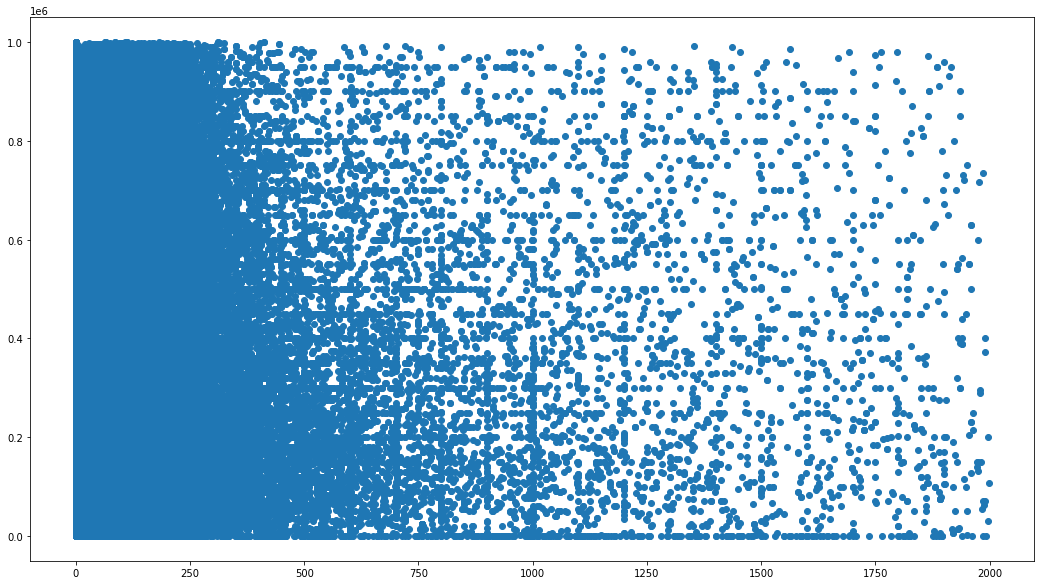

In [96]:

data = fullData[['Surface reelle bati','Valeur fonciere']]
data = data[data['Valeur fonciere'] < 1000000]
data = data[data['Surface reelle bati'] < 2000]
plt.figure(figsize=(18,10))
plt.scatter(data['Surface reelle bati'],data['Valeur fonciere'])
plt.show()

# Analyse plus localisée sur Paris


#### Nombre de mutations par arrondissement

In [121]:
data = fullData.groupby(['Code postal'])['Nature mutation'].count()
map = mapping_Paris_circle(data, False)
map

In [228]:
data = fullData.groupby(['Code postal'])['Nature mutation'].count()
map = mapping_Paris(data)
map

#### Valeur des ventes par arrondissement

In [202]:
data = fullData[fullData['Nature mutation'] == 'Vente']
data = data.groupby(['Code postal'])['Valeur fonciere'].sum()
map = mapping_Paris_circle(data, True)
map

In [263]:
data = fullData[fullData['Nature mutation'] == 'Vente']
data = data.groupby(['Code postal'])['Valeur fonciere'].sum()
map = mapping_Paris(data)
map

In [262]:
data = fullData[fullData['Nature mutation'] == 'Vente']
data = data.groupby(['Code postal'])['Valeur fonciere'].sum()
map = mapping_Marseille(data)
map

# 

<AxesSubplot:xlabel='Type local', ylabel='Valeur fonciere'>

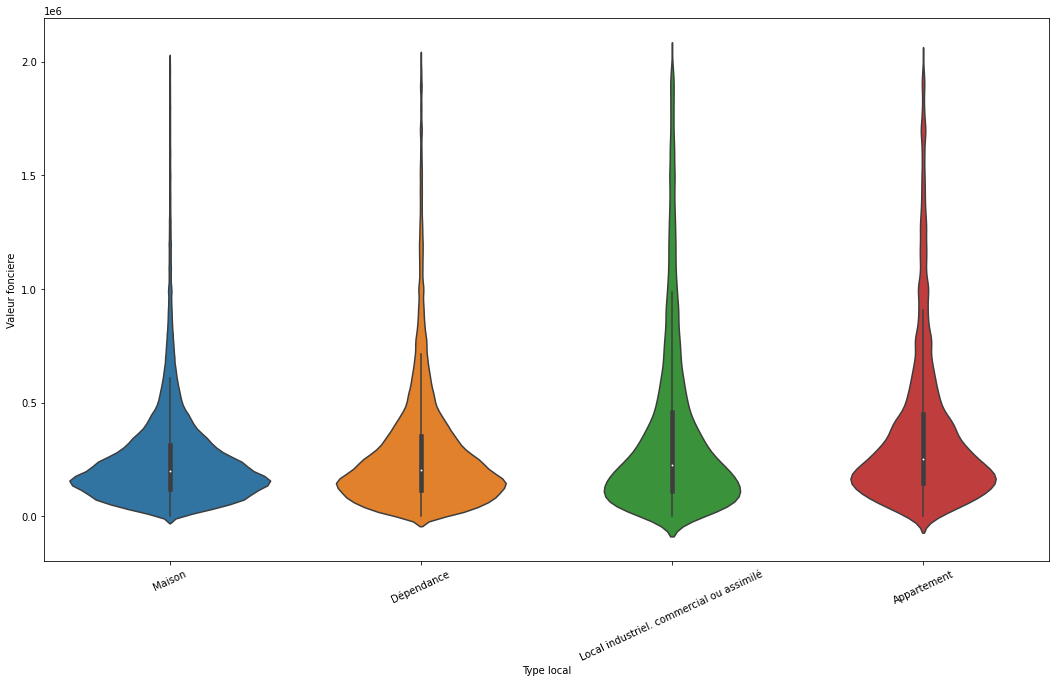

In [31]:
data = fullData[fullData['Valeur fonciere'] < 2000000]
plt.figure(figsize=(18,10))
plt.xticks(rotation=25)
sbn.violinplot(x="Type local",y="Valeur fonciere",data=data)

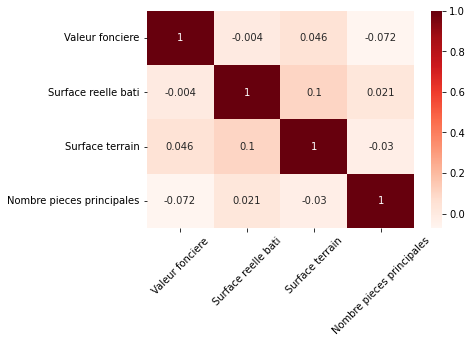

In [196]:
data = fullData[['Valeur fonciere','Surface reelle bati','Surface terrain', 'Nombre pieces principales']]

sbn.heatmap(data.corr(), annot= True, cmap='Reds')
plt.xticks(rotation = 45)
plt.show()

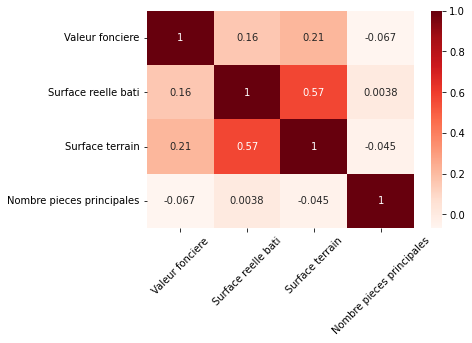

In [200]:
data = fullData[fullData['Code departement'] == '75']
data = data[['Valeur fonciere','Surface reelle bati','Surface terrain', 'Nombre pieces principales']]
sbn.heatmap(data.corr(), annot= True, cmap='Reds')
plt.xticks(rotation = 45)
plt.show()


# Comparaison entre les années

In [41]:
data17 = fullData2017[fullData2017['Nature mutation'] == 'Vente']
data17 = data17.groupby(pd.DatetimeIndex(data17['Date mutation']).month)['Valeur fonciere'].count()
#data17.index = pd.DatetimeIndex(data17.index).month

data18 = fullData2018[fullData2018['Nature mutation'] == 'Vente']
data18 = data18.groupby(pd.DatetimeIndex(data18['Date mutation']).month)['Valeur fonciere'].count()
#data18.index = pd.DatetimeIndex(data18.index).month

data19 = fullData2019[fullData2019['Nature mutation'] == 'Vente']
data19 = data19.groupby(pd.DatetimeIndex(data19['Date mutation']).month)['Valeur fonciere'].count()
#data19.index = pd.DatetimeIndex(data19.index).month

data20 = fullData2020[fullData2020['Nature mutation'] == 'Vente']
data20 = data20.groupby(pd.DatetimeIndex(data20['Date mutation']).month)['Valeur fonciere'].count()
#data20.index = pd.DatetimeIndex(data20.index).month

data21 = fullData2021[fullData2021['Nature mutation'] == 'Vente']
data21 = data21.groupby(pd.DatetimeIndex(data21['Date mutation']).month)['Valeur fonciere'].count()
#data21.index = pd.DatetimeIndex(data21.index).month

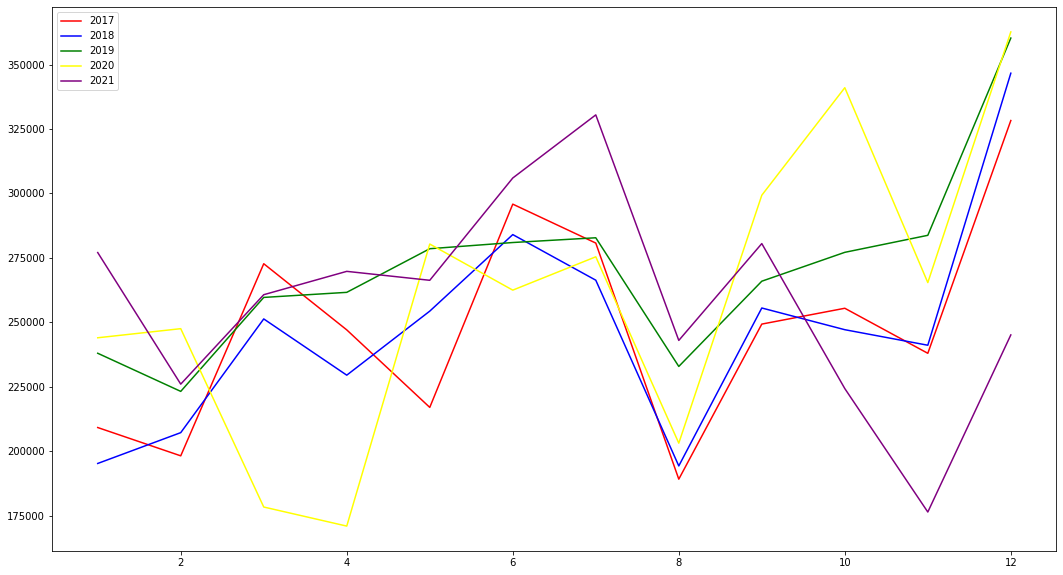

In [44]:
plt.figure(figsize=(18,10))
plt.plot(data17.index, data17.values, color="red")
plt.plot(data18.index, data18.values, color="blue")
plt.plot(data19.index, data19.values, color="green")
plt.plot(data20.index, data20.values, color="yellow")
plt.plot(data21.index, data21.values, color="purple")
plt.legend(["2017", "2018", "2019", "2020", "2021"])
plt.show()